# Data 512A : Human-centered data science

## A5: Final project - Russian ads

Date: 11/20/2019  
Author: Benjamin Brodeur Mathieu

## Q1 - Were some targeted demographics more engaged with the IRA ads?

In [146]:
import pandas as pd
import numpy as np
import re

ads_df = pd.read_csv('../clean_data/labeled_clean_data.csv', parse_dates=['ad_creation_date', 'ad_end_date'])
ads_df.head(3)

,file_name,ad_targeting_interests,ad_impressions,ad_clicks,ad_spend,ad_creation_date,ad_end_date,ad_interests_array,demographic
0,P(1)0002823.txt,"Pan-Africanism, African-American Civil Rights...",10496,1823,200.00,2017-04-21,2017-04-22,"['Pan-Africanism', 'African-American Civil Rig...",African-American
1,P(1)0002837.txt,"Pan-Africanism, African-American Civil Rights...",16305,1337,499.49,2017-04-13,2017-04-14,"['Pan-Africanism', 'African-American Civil Rig...",African-American
2,P(1)0006304.txt,"Martin Luther King, Jr., Stop Racism!!, Afric...",8210,1788,1570.03,2017-05-29,2017-05-29,"['Martin Luther King', 'Jr.', 'Stop Racism!!',...",African-American


In [75]:

ads_df['ad_count'] = 1
ads_df['Click through rate'] = ads_df.apply(lambda x: x.ad_clicks / x.ad_impressions, axis=1)
ads_df = ads_df.sort_values(by='demographic')

ads_df.groupby('demographic').agg({'Click through rate': 'mean'})

,Click through rate
demographic,
African-American,0.110120
Free music software,0.004678
LGBT,0.117679
Left wing,0.093739
Memes,0.149860
Mexican-American,0.132979
Muslim-American,0.076429
Native-American,0.129414
Right wing,0.104408


In [76]:
import matplotlib.pyplot as plt

aa = ads_df[ads_df['demographic'] == 'Memes']



In [77]:
summary_by_demographic = ads_df.groupby('demographic').agg({'ad_spend':'sum','ad_impressions':'sum', 'ad_clicks': 'sum', 'ad_count': 'sum'})

summary_by_demographic['Click through rate'] = summary_by_demographic.apply(lambda x: x.ad_clicks / x.ad_impressions, axis=1)
summary_by_demographic.sort_values(by='Click through rate', ascending=False)

,ad_spend,ad_impressions,ad_clicks,ad_count,Click through rate
demographic,,,,,
Mexican-American,134419.12,6010785,726984,189,0.120947
Native-American,18168.12,82153,9547,19,0.116210
African-American,2029429.65,21057235,2042313,1351,0.096989
Memes,93467.82,957425,90546,138,0.094572
LGBT,304035.92,892362,82405,97,0.092345
Left wing,66941.73,118748,9429,18,0.079403
Right wing,2004193.24,8112710,596729,329,0.073555
Self-Defense,23002.17,34129,1523,17,0.044625
Muslim-American,261007.35,560328,21077,49,0.037615


## TODO: add step to remove lines with CTR > 1

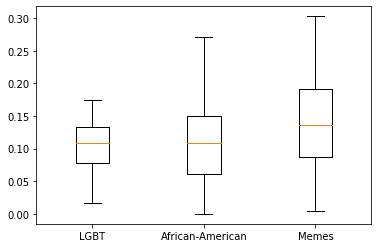

In [78]:
lgbt = ads_df[ads_df['demographic'] == 'LGBT']['Click through rate']
aa = ads_df[ads_df['demographic'] == 'African-American']['Click through rate']
memes = ads_df[ads_df['demographic'] == 'Memes']['Click through rate']

plt.boxplot([lgbt, aa, memes], 0, '')
plt.xticks([1,2,3], ['LGBT', 'African-American', 'Memes'])
plt.show()

According to our dataset, Mexican-Americans interacted the most with the IRA ads followed by Native-Americans.
African-Americans people who like memes and the lgbt community were next in the ninteties. Both Left leaning and Right leaning groups had a click through rate less than 8%.

## Question 2 - Are targeted demographics who are shown more ads more likely to interact with them?

In [79]:
ctr_by_spend_and_count = summary_by_demographic[['ad_spend', 'ad_count', 'ad_impressions', 'Click through rate']]

In [80]:
ctr_by_spend_and_count.sort_values(by='Click through rate', ascending=False)

,ad_spend,ad_count,ad_impressions,Click through rate
demographic,,,,
Mexican-American,134419.12,189,6010785,0.120947
Native-American,18168.12,19,82153,0.116210
African-American,2029429.65,1351,21057235,0.096989
Memes,93467.82,138,957425,0.094572
LGBT,304035.92,97,892362,0.092345
Left wing,66941.73,18,118748,0.079403
Right wing,2004193.24,329,8112710,0.073555
Self-Defense,23002.17,17,34129,0.044625
Muslim-American,261007.35,49,560328,0.037615


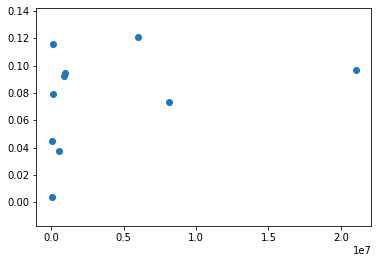

In [81]:
plt.scatter(ctr_by_spend_and_count.ad_impressions, ctr_by_spend_and_count['Click through rate'])

There does not seem to be a relationship between the number of ads show to a demographic and the click through rate.

## Question 3 - How did the amount of ads seen by targeted demographics change preceding political events?

The image below taken from a [report](https://comprop.oii.ox.ac.uk/wp-content/uploads/sites/93/2018/12/IRA-Report.pdf) made by an Oxford group shows that the number of ads on Facebook spiked before and sometimes shortly after important political events of the 2016 election.

![Oxford events important political events timeline](../assets/pictures/important_events.png)

12/18/2015 - [Third democratic debate](https://en.wikipedia.org/wiki/2016_Democratic_Party_presidential_debates_and_forums#Schedule)  
01/14/2016 - [Sixth republican debate](https://en.wikipedia.org/wiki/2016_Republican_Party_presidential_debates_and_forums)  
02/01/2016 - [Iowa caucuses (start of primaries)](https://en.wikipedia.org/wiki/2016_Democratic_Party_presidential_primaries)  
06/14/2016 - [End of primaries](https://en.wikipedia.org/wiki/2016_Democratic_Party_presidential_primaries)  
09/16/2016 - [First presidential debate between Hillary and Donald](https://en.wikipedia.org/wiki/2016_United_States_presidential_debates#First_presidential_debate)  
10/04/2016 - [Second presidential debate between Hillary and Donald](https://en.wikipedia.org/wiki/2016_United_States_presidential_debates#Second_presidential_debate)  
10/14/2016 - [Third presidential debate between Hillary and Donald](https://en.wikipedia.org/wiki/2016_United_States_presidential_debates#Third_presidential_debate)  
11/08/2016 - [Election day](https://en.wikipedia.org/wiki/2016_United_States_presidential_election)  
12/29/2016 - [Obama announces sanctions against Russia](https://en.wikipedia.org/wiki/Special_Counsel_investigation_(2017%E2%80%932019)#Links_between_Trump_associates_and_Russian_officials)

First we import a few libraries which will be useful:
    * datetime for calculating time intervals
    * matplotlib's pyplot for graphing

In [112]:
from datetime import timedelta
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
register_matplotlib_converters()

We then create a dictionary of important events and the timerange before and after the important date we will be examining. For each important events, we add the event_name entry which will be used whend displaying the results as well as a mask entry which will enable us to filter adds to the selected period.

In [113]:
political_events = {
    '12/18/2015': {'date_range': [], 'event_name': '3rd Dem. debate', 'mask': [] },
    '01/14/2016': {'date_range': [], 'event_name': '6th Rep. debate', 'mask': [] },
    '02/01/2016': {'date_range': [], 'event_name': 'Iowa caucuses', 'mask': [] },
    '06/14/2016': {'date_range': [], 'event_name': 'End of primary', 'mask': [] },
    '09/16/2016': {'date_range': [], 'event_name': '1st Pres. debate', 'mask': [] },
    '10/04/2016': {'date_range': [], 'event_name': '2nd Pres. debate', 'mask': [] },
    '10/14/2016': {'date_range': [], 'event_name': '3rd Pres. debate', 'mask': [] },
    '11/08/2016': {'date_range': [], 'event_name': 'Election', 'mask': [] },
    '12/29/2016': {'date_range': [], 'event_name': 'Sanctions on Russia', 'mask': [] }
}

Ads currently have an start and sometimes and end date. According to the "CITATION HERE" study, ads that only have a creation date are most likely to have run for that day only where ads that have both a start and end date have ran for mutliple days. To filter the ads to a given date range around the political event we first need to duplicate rows so that the number of ads shown by demographic by day can be counted correctly.

Below we create a function which duplicates rows that ran for multiple days.

In [114]:
# Given a dataframe with non-null start date string column and end date string column
# returns a new dataset with duplicate rows for all days between start and end date inclusive
def expand_dates(df, start, end, new_col_name):
    all_rows = []
    
    # For each row
    for index, row in df.iterrows():
        # Select start date
        start_timestamp = pd.to_datetime(row[start])
        
        # If end date is null put same as start
        if (pd.isnull(row[end])):
            end_timestamp = start_timestamp
        else:
            end_timestamp = pd.to_datetime(row[end])

        # For dates until active is bigger than end
        active_timestamp = start_timestamp
        while active_timestamp <= end_timestamp:
            new_row = row.append(pd.Series([active_timestamp], index=[new_col_name]))
            all_rows.append(new_row)
            active_timestamp += timedelta(days=1)
    
    return pd.DataFrame(all_rows)

In [115]:
ads_dates_expanded = expand_dates(ads_df, 'ad_creation_date', 'ad_end_date', 'active_date')
ads_dates_expanded.head(3)

,file_name,ad_targeting_interests,ad_impressions,ad_clicks,ad_spend,ad_creation_date,ad_end_date,ad_interests_array,demographic,ad_count,Click through rate,active_date
0,P(1)0002823.txt,"Pan-Africanism, African-American Civil Rights...",10496,1823,200.0,2017-04-21,2017-04-22,"[Pan-Africanism, African-American Civil Rights...",African-American,1,0.173685,2017-04-21
1,P(1)0002823.txt,"Pan-Africanism, African-American Civil Rights...",10496,1823,200.0,2017-04-21,2017-04-22,"[Pan-Africanism, African-American Civil Rights...",African-American,1,0.173685,2017-04-22
2,P(1)0002917.txt,"Pan-Africanism, African-American Civil Rights...",83675,12275,400.0,2017-02-08,2017-02-09,"[Pan-Africanism, African-American Civil Rights...",African-American,1,0.146699,2017-02-08


In [116]:
def get_start_end_date(middle_date_string, days):
    middle_date_timestamp = pd.to_datetime(middle_date_string)
    end_date = middle_date_timestamp + timedelta(days=days)
    start_date = middle_date_timestamp - timedelta(days=days)
    return start_date, end_date

# We will be graphing 7 days before and after the event's date
days_range = 7
for date_string, _ in political_events.items():
    start_date, end_date = get_start_end_date(date_string, days_range)
    # For each political event create a mask to only get the ads in the date range
    political_events[date_string]['mask'] = (ads_dates_expanded['active_date'] >= start_date) & (ads_dates_expanded['active_date'] <= end_date)

We create one dataframe for each of the political events to simplify the charting.

In [117]:
def get_date_range(middle_date_string, days):
    middle_date_timestamp = pd.to_datetime(middle_date_string)
    end_date = middle_date_timestamp + timedelta(days=days)
    start_date = middle_date_timestamp - timedelta(days=days)
    
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date = current_date + timedelta(days=1)

In [134]:
def get_stackplot_data(rows, event_date_string):
    plot_data = []
    labels = []
    for demographic in rows['demographic'].unique():
        labels.append(demographic)
        
        demographic_ads_rows = rows[rows['demographic'] == demographic]
        ads_for_demographic_by_date = demographic_ads_rows.groupby('active_date').agg({'ad_clicks': 'sum'}).ad_clicks #demographic_ads_rows['active_date'].value_counts().sort_index()
        
        values = []
        date_indexes = []

        # For each date in the interval
        for date in get_date_range(event_date_string, days_range):
            # If no ads were sent for the date add a 0 count entry
            if date not in ads_for_demographic_by_date:
                date_indexes.append(date)
                values.append(0)

        if len(values) > 0:
            ads_for_demographic_by_date = ads_for_demographic_by_date.append(pd.Series(values, index=date_indexes))
        
        plot_data.append(ads_for_demographic_by_date.sort_index())
        
    return plot_data, labels

In [129]:
rows_for_dates = ads_dates_expanded[political_events['12/29/2016']['mask']]

demographic_ads_rows = rows_for_dates[rows_for_dates['demographic'] == 'African-American']

demographic_ads_rows.groupby('active_date').agg({'ad_impressions': 'sum'}).ad_impressions


active_date
2016-12-22     18790
2016-12-23     22374
2016-12-24     22374
2016-12-25     19302
2016-12-26     22939
2016-12-27    219393
2016-12-28    137659
2016-12-29    133871
2016-12-30    115357
2016-12-31     18790
2017-01-01     18790
2017-01-02     18790
2017-01-03     18790
2017-01-04     18790
2017-01-05     18790
Name: ad_impressions, dtype: int64

In [135]:
for key, dictionary in political_events.items():
    rows_for_dates = ads_dates_expanded[dictionary['mask']]
    plot_data, labels = get_stackplot_data(rows_for_dates, key)
    dictionary['plot_data'] = plot_data
    dictionary['labels'] = labels

We generate a dictionary for the color for the following stack charts

In [136]:
# Palette generated using http://vrl.cs.brown.edu/color
pal = ['#35618f', '#87c5af', '#d6765e', '#60eea3', '#9e194d', '#b3e61c', '#dc5dd8', '#d2c966', '#60249e', '#d5d0fa']

# Generate the list of demographics identified
demographic_list = list(ads_df['demographic'].unique())

# Map demographics to a color in the palette
color_dict = { demographic_list[i] : pal[i] for i in range(len(demographic_list))}

def get_color_map(labels):
    return [color_dict[label] for label in labels]

Generate graphs

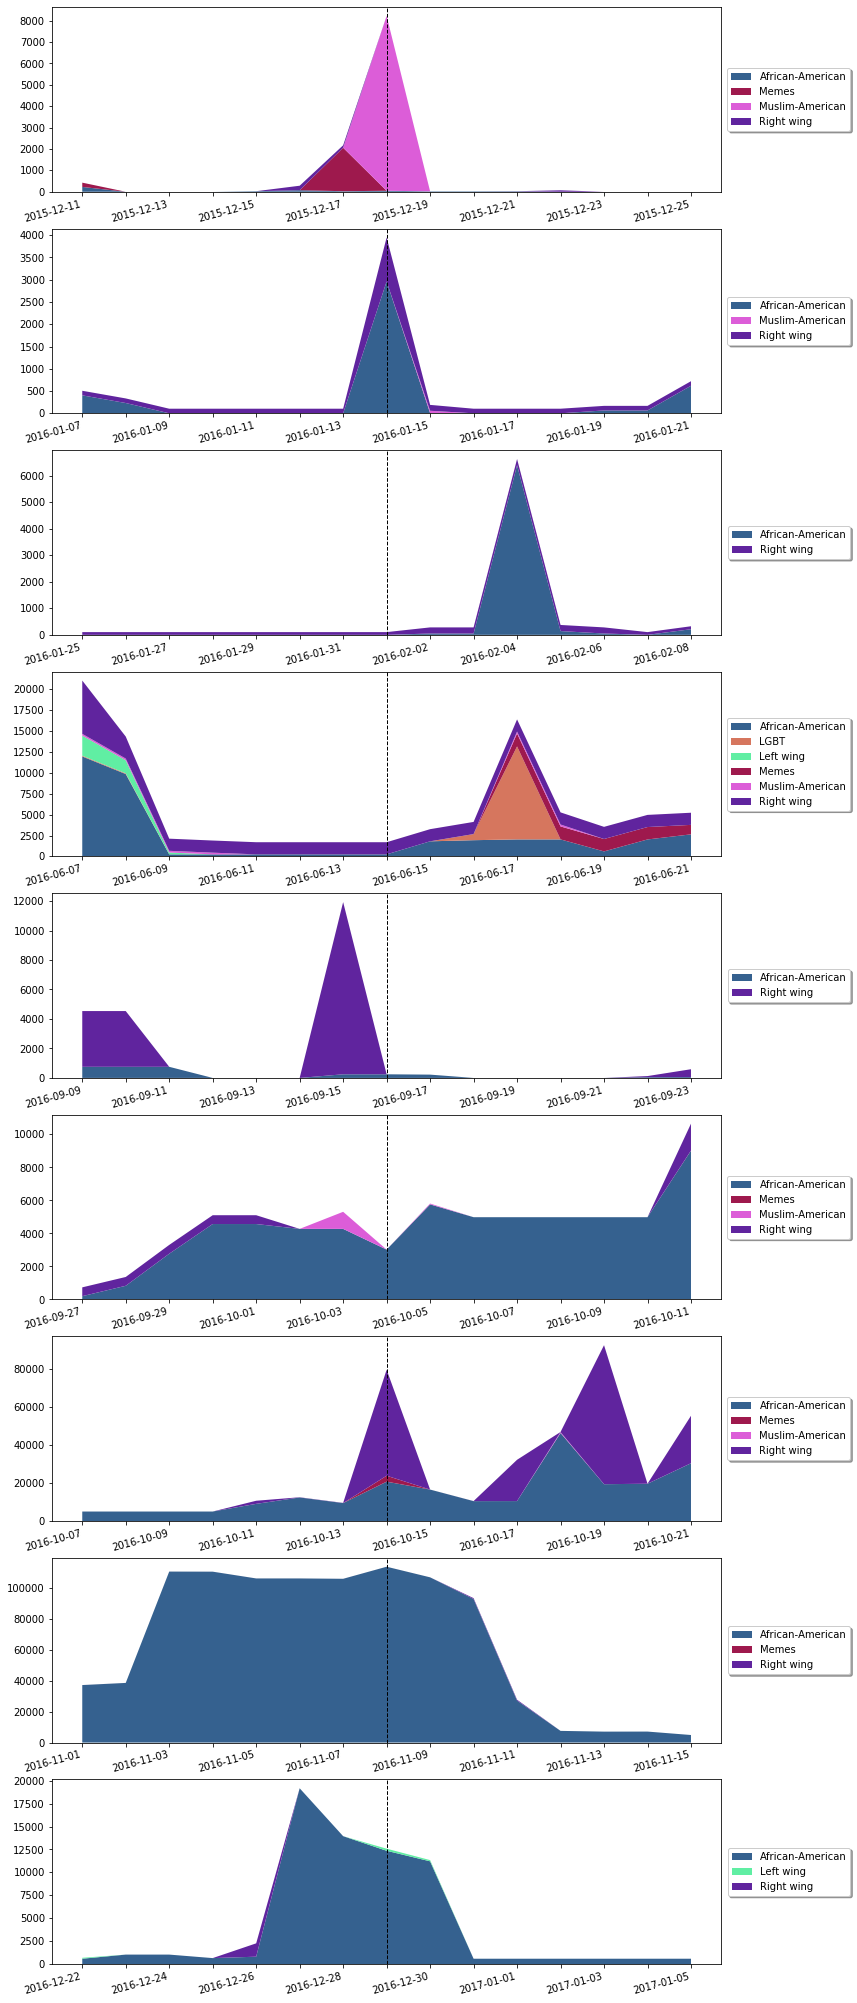

In [144]:
date_form = DateFormatter("%Y-%m-%d")
event_count = len(political_events)
event_date_strings = list(political_events.keys())
fig, axs = plt.subplots(event_count, figsize=(12, event_count*4))
for i in range(event_count):
    # Get the date and date string of the event we are graphing
    event_date_string = event_date_strings[i]
    event_date = pd.to_datetime(event_date_string)
    
    # Get the data and labels for the plot
    plot_data = political_events[event_date_string]['plot_data']
    labels = political_events[event_date_string]['labels']
    dates_to_plot = [x for x in plot_data[0].index]
    
    # Get the axis object from matplotlib
    ax = axs[i]
    
    # Add a line for the event date
    ax.axvline(event_date, linestyle='--', linewidth=1, c='black')
    
    # Each graph has its own x axis
    ax.set_xticks(dates_to_plot)
    
    # X label dates with yyyy-mm-dd format
    ax.xaxis.set_major_formatter(date_form)
    
    # Plot values for date ascending, the color map ensures the same demographic is 
    # always drown using the same color
    ax.stackplot(dates_to_plot, plot_data, labels=labels, colors=get_color_map(labels))
    ax.legend(loc='right', ncol=1, bbox_to_anchor=(1.2, .5), shadow=True)
    label_index = 1
    for label in ax.get_xticklabels():
                label.set_ha('right')
                label.set_rotation(15)
                label.set_visible(label_index%2)
                label_index += 1